<a href="https://colab.research.google.com/github/kaytlyn724/MAT422/blob/main/HW3.7_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.7 Neural Networks**

---

Artificial neural networks is a collection of connected layers of units or nodes
to loosely model the neurons in a biological brain. In this section, we illustrate the use of differentiation for training artificial neural networks to minimize cost functions.


### **Key Concepts:**

*   3.7.1. Mathematical formulation
*   3.7.2. Activation functions
*   3.7.3. Cost function
*   3.7.4. Backpropagation
*   3.7.5. Backpropagation algorithm

In [ ]:
### important imports to run code ###

import numpy as np
import matplotlib.pyplot as plt

## **3.7.1. Mathematical Formulation**

**Mathematical Formulation:** In neural networks, the weights, the $w_i$, and the bias, $b$, will be found numerically in order to best fitthe forecast output with the given data.

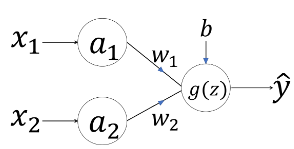

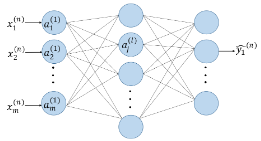

A general network may have hundreds or thousands of nodes. It demonstrates the
inputs and outputs of neural networks. The input units receive various forms
and structures of information based on an internal weighting system, and the
neural network attempts to learn about the information presented to produce
one output report. Specifically, it adjusts its weighted associations according
to a learning rule and using this error value. Successive adjustments will
cause the neural network to produce output which is increasingly similar to
the target output. After a suﬀicient number of these adjustments the training can be terminated based upon certain criteria. This is known as supervised
learning.

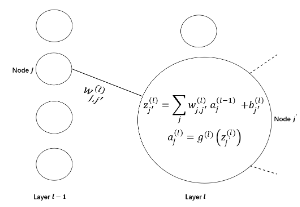

Now we formulate mathematical notation for a neural network. We look at how values of layer $l$ are determined from layer $l − 1$, $w^l$ , $b^l$. We label the two layers as $l − 1$ and $l$. Also notice that the general node in
the left-hand layer is labelled $j$ and one in the right-hand layer, layer $l$, is labelled $j′$. We want to calculate what value goes into the $j′^{th}$ node of the $l^{th}$ layer. First multiply the value $a^{(l−1)}_j$ in the $j^{th}$ node of the previous, $(l − 1)^{th}$, layer by the parameter $w^{(l)}_{j,j′}$ and then add another parameter $b^{(l)}_{j′}$. Then we add up all of these for every node in layer $l − 1$.

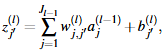

where $j_l$ means the number of nodes in layer $l$. For a given activation function, $σ$, we end up with the following expression for the values in the next layer,

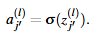

In matrix form,

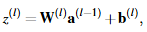

with the matrix $W^{(l)}$ containing all the multiplicative parameters, i.e. the
weights $w^{(l)}_{j, j′}$ , and $b^{(l)}$ is the bias. The bias is just the constant in the linear transformation.

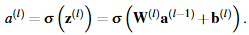

Hidden Layer Output:
[[0.         0.45002119 0.56845103 0.13453494]]

Output Layer Output:
[[0.3741626 0.6258374]]


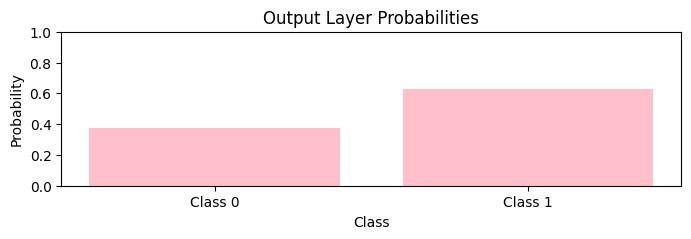

In [ ]:
# Example weights and biases for a simple 2-layer network
# Input to hidden layer weights
W1 = np.random.randn(3, 4)
# Input to hidden layer biases
b1 = np.zeros((1, 4))
# Hidden to output layer weights
W2 = np.random.randn(4, 2)
# Hidden to output layer biases
b2 = np.zeros((1, 2))

# Activation functions
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

# Example input features
input_values = [0.1, 0.8, 0.5]

# Forward pass function
def forward_pass(inputs):
    # Create the input array with the provided values
    X = np.array([inputs])

    # Compute hidden layer output
    hidden_layer_output = relu(np.dot(X, W1) + b1)

    # Compute output layer output
    output_layer_output = softmax(np.dot(hidden_layer_output, W2) + b2)

    # Print results
    print("Hidden Layer Output:")
    print(hidden_layer_output)
    print("\nOutput Layer Output:")
    print(output_layer_output)

    # Plot the output layer probabilities
    plt.figure(figsize=(8, 2))
    plt.bar(range(output_layer_output.shape[1]), output_layer_output[0], color='pink')
    plt.title("Output Layer Probabilities")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.xticks(range(output_layer_output.shape[1]), ['Class 0', 'Class 1'])
    plt.ylim(0, 1)
    plt.show()

# Call the forward pass function with fixed input values
forward_pass(input_values)

## **3.7.2. Activation Functions**

**Activation Functions:** In neural networks, the activation function of a node abstracts the output of that node given an input or set of inputs for specific purposes for example, classification. In biological neural networks, the activation function may represent an electrical signal wether if the neuron fires. We use $σ$ to represent the activation functions. It will be the same for all nodes in a layer.

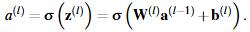

There are a number of acitivation functions:

- **Step Function:** This is also called the Heaviside step function, or the unit step function, often represents a signal that switches on at a specified time and stays switched on indefinite. The step function can be use for classification problems.

  - 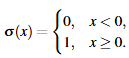

- **ReLU Function:** ReLU stands for Rectified Linear Units. It’s one of the most commonly used activation function. The signal either passes through untouched or dies completely. It was found to enable better training of deeper networks compared to the widely used activation functions. Rectified linear units, compared to sigmoid function or similar activation functions, allow faster and effective training of deep neural architectures on large and complex datasets.

  - image.png

- **Sigmoid or Logistic Function:** The logistic function finds applications in a range of fields, including biomathematics. The logistic sigmoid can be used in the output layer for predicting probability.

  - 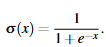

- **Softmax Function:** The softmax function converts a vector of numbers (an array of K values (z)) into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector. It is thus a function that turns several numbers into quantities that can be perhaps interpreted as probabilities. It is often used in the final, output, layer of a neural network, especially with classification problems.

  - 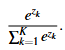



Softmax result: [0.09003057 0.24472847 0.66524096]


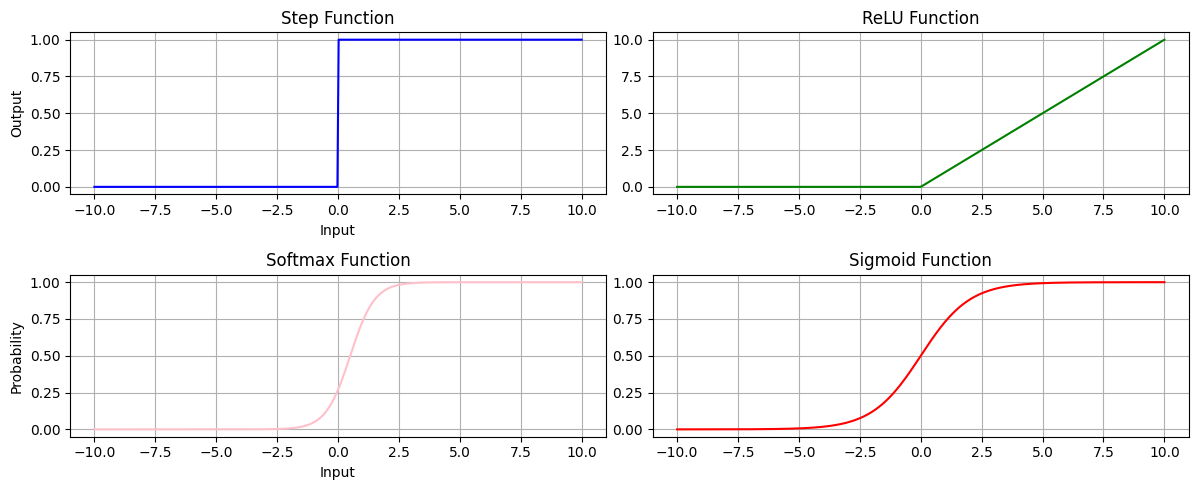

In [ ]:
# Demonstration of different activation functions
def relu(x):
    """ReLU activation function."""
    return np.maximum(0, x)

def softmax(x):
    """Softmax activation function."""
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Softmax function applied to a range of values
def softmax_vector(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum()

# Plot the functions
x = np.linspace(-10, 10, 400)

# Step function
step_function = np.heaviside(x, 1)

# Generate softmax output for visual purposes
softmax_values = [softmax_vector(np.array([val, 1-val]))[0] for val in x]

plt.figure(figsize=(12, 5))

# Plot Step Function
plt.subplot(2, 2, 1)
plt.plot(x, step_function, label='Step Function', color='blue')
plt.title('Step Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

# Plot Softmax Function
plt.subplot(2, 2, 3)
plt.plot(x, softmax_values, label='Softmax Output', color='pink')
plt.title('Softmax Function')
plt.xlabel('Input')
plt.ylabel('Probability')
plt.grid(True)

# ReLU plot
plt.subplot(2, 2, 2)
plt.plot(x, relu(x), label='ReLU Function', color='green')
plt.title('ReLU Function')
plt.grid(True)

# Sigmoid plot
plt.subplot(2, 2, 4)
plt.plot(x, sigmoid(x), label='Sigmoid Function', color='red')
plt.title('Sigmoid Function')
plt.grid(True)

# Softmax demonstration (2D array)
z_vector = np.array([1.0, 2.0, 3.0])
softmax_result = softmax(z_vector)
print("Softmax result:", softmax_result)

plt.tight_layout()
plt.show()

## **3.7.3. Cost Function**

**Cost Function:** In practice, we can use the least squares for a cost function. Since we will have a set of independent input data $y^n$ (from the training dataset) and corresponding output data $yˆ^n$ or the forecast output. $k$ is the $k$-th node of the output. We define the cost function as

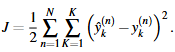

For classification problems where only one output, the cost function commonly used for such an output is similar to logistic regression. And this is,
for a binary classification $(y^{(n)} = 0, 1)$, the cost function is

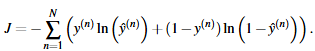

This is related to the cross entropy function.

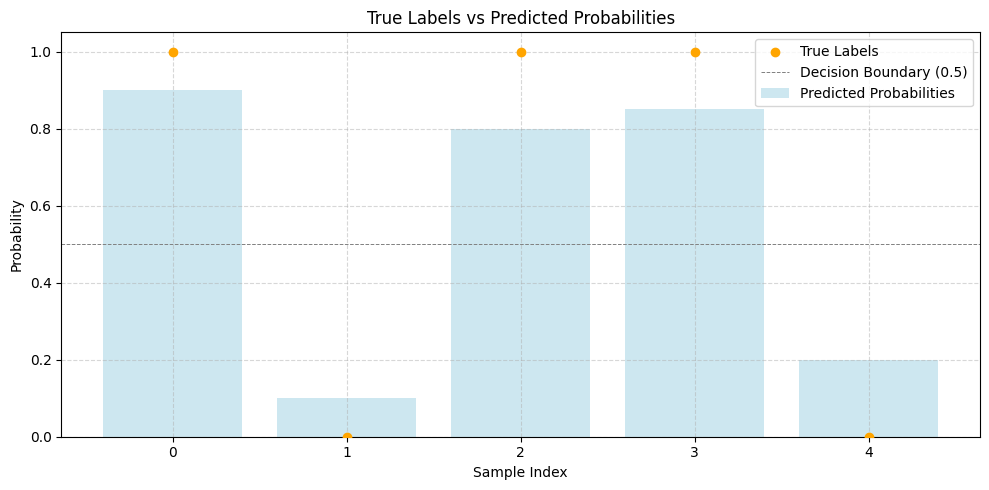

In [ ]:
# Example binary cross-entropy cost calculation
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# True labels for binary classification
y_true = np.array([1, 0, 1, 1, 0])

# Simulated probabilities
y_pred = np.array([0.9, 0.1, 0.8, 0.85, 0.2])

# Visualize True Labels and Predicted Probabilities
plt.figure(figsize=(10, 5))
plt.bar(range(len(y_true)), y_pred, alpha=0.6, color='lightblue', label='Predicted Probabilities')
plt.scatter(range(len(y_true)), y_true, color='orange', label='True Labels', zorder=3)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.7, label='Decision Boundary (0.5)')
plt.title("True Labels vs Predicted Probabilities")
plt.xlabel("Sample Index")
plt.ylabel("Probability")
plt.xticks(range(len(y_true)))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## **3.7.4. Backpropagation**

**Backpropagation:** Back-propagation is the essence of neural network training. It is the practice of fine-tuning the weights of a neural network based on the error rate (i.e. loss) obtained in the previous iteration. Proper tuning of the weights ensures lower error rates, making the model reliable by increasing its generalization. We want to minimize the cost function, $J$, with respect to the parameters, the components of $W$ and b. To do that using gradient descent we are going to need the derivatives of $J$ with respect to each of those parameters. Here we focus the layer $l$ and node $j′$ and node $j$ from layer $l − 1$.

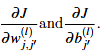

...

As a result, we can find the $δ$s in a layer if we know the $δ$s in all layers to the right. In summary, we have

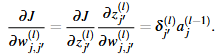

Now the derivatives of the cost function, $J$, to the $w$s can be written in terms of the $δ$s which in turn are backpropagated from the network layers that
are just to the right, one nearer the output. And the derivatives of the cost
function to the bias, $b$ is quite simple,

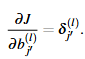

It is clear that the derivatives of $J$ is depending on which activation function we use. If it is ReLU then the derivative is either zero or one. If we use the logistic function then we find that $σ′(z) = σ(1 − σ)$.


In [ ]:
# Binary cross-entropy cost function
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Modified sigmoid function with numerical stability
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

# Backpropagation simulation with improved output
def train_neural_network(X, y, W, b, learning_rate=0.1, epochs=200, patience=10):
    best_loss = float('inf')
    patience_counter = 0

    print(f"{'Epoch':<6} {'Loss':<10} {'Weights':<40} {'Biases':<10}")  # Header for clarity

    for epoch in range(epochs):
        # Forward pass
        z = np.dot(X, W) + b
        a = sigmoid(z)

        # Compute loss
        loss = binary_cross_entropy(y, a)

        # Backpropagation step
        dz = a - y
        dW = np.dot(X.T, dz) / X.shape[0]
        db = np.sum(dz) / X.shape[0]

        # Update weights and biases
        W -= learning_rate * dW
        b -= learning_rate * db

        # Early stopping logic
        if loss < best_loss:
            best_loss = loss
            patience_counter = 0
        else:
            patience_counter += 1

        # Print output every 20 epochs
        if epoch % 20 == 0:
            print(f"{epoch:<6} {loss:<10.4f} {W.flatten()} {b.flatten()}")

        # Check for early stopping
        if patience_counter >= patience:
            print("Early stopping...")
            break

    return W, b

# Example call with random data
X = np.random.rand(100, 3)
y = (np.sum(X, axis=1) > 1.5).astype(int).reshape(-1, 1)
W = np.random.randn(3, 1)
b = np.zeros((1, 1))

W, b = train_neural_network(X, y, W, b)

Epoch  Loss       Weights                                  Biases    
0      0.9267     [-1.68056094  0.09232974  0.33089525] [0.02763237]
20     0.7168     [-1.34584029  0.3903172   0.58186421] [0.35710936]
40     0.6733     [-1.16301183  0.55251921  0.69772384] [0.43268127]
60     0.6574     [-1.04346749  0.66012757  0.76056855] [0.40751858]
80     0.6463     [-0.9502905   0.74505903  0.80237311] [0.34266703]
100    0.6364     [-0.86877557  0.81975745  0.83555527] [0.26213672]
120    0.6269     [-0.79285622  0.88932716  0.86518268] [0.17578727]
140    0.6178     [-0.71996663  0.95593683  0.89338186] [0.08776911]
160    0.6089     [-0.64900506  1.02053354  0.92105366] [-0.00015651]
180    0.6003     [-0.579492    1.08354567  0.94857781] [-0.08724684]


## **3.7.5. Backpropagation Algorithm**

**Backpropagation Algorithm:** From above analysis, we can easily derive the backpragation algorithm as follows. First we initialize weights and biases, typically at random. Then pick input data and input the vector x into the left side of the network, and calculate all the $z_s$, $a_s$, etc. And finally calculate the output $yˆ$. We now can update the parameters by the (stochastic)gradient descent. Repeat the process until the desired accuracy is reached. For example, if using the quadratic cost function in one dimension, then

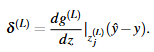

Continue to the left

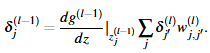

Then update the weights and biases using the following formulas.

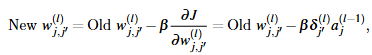

and

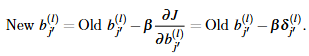

Epoch 0: Loss = 0.7368
Epoch 100: Loss = 0.6870
Epoch 200: Loss = 0.6657
Epoch 300: Loss = 0.6568
Epoch 400: Loss = 0.6528
Epoch 500: Loss = 0.6506
Epoch 600: Loss = 0.6490
Epoch 700: Loss = 0.6478
Epoch 800: Loss = 0.6466
Epoch 900: Loss = 0.6456
Epoch 1000: Loss = 0.6446
Epoch 1100: Loss = 0.6437
Epoch 1200: Loss = 0.6429
Epoch 1300: Loss = 0.6421
Epoch 1400: Loss = 0.6414
Epoch 1500: Loss = 0.6407
Epoch 1600: Loss = 0.6400
Epoch 1700: Loss = 0.6394
Epoch 1800: Loss = 0.6388
Epoch 1900: Loss = 0.6382
Epoch 2000: Loss = 0.6377


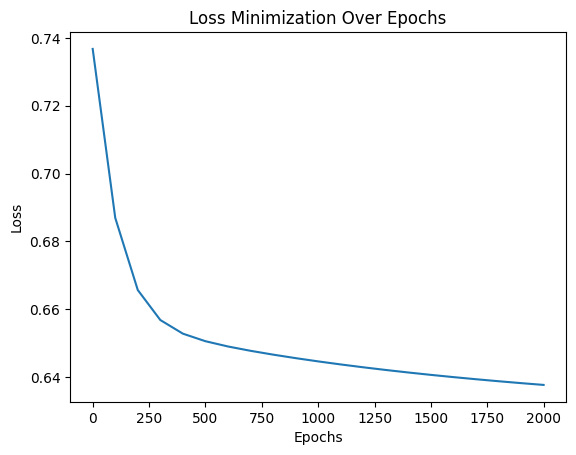

In [ ]:
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Binary cross-entropy loss function
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Forward pass function
def forward_pass(X, W, b):
    # Linear transformation
    z = np.dot(X, W) + b
    # Apply activation function
    a = sigmoid(z)
    return z, a

# Backpropagation function for a simple two-layer network
def backprop(X, y, weights, biases, activations, learning_rate):
    # Forward pass
    # First layer
    z1, a1 = forward_pass(X, weights[0], biases[0])
    # Output layer
    z2, a2 = forward_pass(a1, weights[1], biases[1])

    # Backward pass
    # Output layer error (difference between predicted and actual)
    output_error = a2 - y
    # Gradient for weights[1]
    dW2 = np.dot(a1.T, output_error) / X.shape[0]
    # Gradient for biases[1]
    db2 = np.sum(output_error, axis=0, keepdims=True) / X.shape[0]

    # Hidden layer error
    hidden_error = np.dot(output_error, weights[1].T) * sigmoid_derivative(z1)
    # Gradient for weights[0]
    dW1 = np.dot(X.T, hidden_error) / X.shape[0]
    # Gradient for biases[0]
    db1 = np.sum(hidden_error, axis=0, keepdims=True) / X.shape[0]

    # Update weights and biases using gradient descent
    weights[1] -= learning_rate * dW2
    biases[1] -= learning_rate * db2
    weights[0] -= learning_rate * dW1
    biases[0] -= learning_rate * db1

    return weights, biases

# Full example of backpropagation training for a single epoch
def train_neural_network(X, y, weights, biases, activations, epochs=2100, learning_rate=0.01):
    losses = []
    for epoch in range(epochs):
        weights, biases = backprop(X, y, weights, biases, activations, learning_rate)
        if epoch % 100 == 0:
            # Compute and print the cost every 100 epochs
            _, y_pred = forward_pass(X, weights[0], biases[0])
            _, y_pred_final = forward_pass(y_pred, weights[1], biases[1])
            loss = binary_cross_entropy(y, y_pred_final)
            losses.append(loss)
            print(f'Epoch {epoch}: Loss = {loss:.4f}')

    # Plot the loss over epochs
    plt.plot(np.arange(0, epochs, 100), losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Minimization Over Epochs')
    plt.show()

    return weights, biases

# Sample data, weights, and biases initialization
X = np.random.randn(100, 3)
y = (np.random.rand(100, 1) > 0.5).astype(int)

# Initial weights and biases (for a simple network with one hidden layer)
input_dim = X.shape[1]
# Number of nodes in the hidden layer
hidden_dim = 5
# One output node
output_dim = 1

weights = [np.random.randn(input_dim, hidden_dim), np.random.randn(hidden_dim, output_dim)]
biases = [np.zeros((1, hidden_dim)), np.zeros((1, output_dim))]

# Define activations (e.g., sigmoid for both layers)
activations = [sigmoid, sigmoid]

# Train the network
weights, biases = train_neural_network(X, y, weights, biases, activations)